# Import Libraries

In [1]:
# Data manipulation and scientific computing
import pandas as pd
import numpy as np
import scipy

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from visualizers import plot
from visualizers import subplot
from visualizers import plot_fitness

# Other modules for preprocessing
from utils import read_data
from utils import convert_data_to_dataframe
from utils import check_date_integrity
from utils import check_shape_integrity
from utils import check_period_integrity
from utils import drop_indicator
from utils import align_dataframes
from utils import combine_dfs
from utils import fearandgreed_integrity_check

# Optimization
from optimizers import linear_genetic_algorithm
from optimizers import mlp_genetic_algorithm

# Model 
import tensorflow as tf
from tensorflow.keras import layers

# Strategy
from utils import strategy

2024-07-29 08:54:05.558576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Read Dataset

In [2]:
# Base directory where dataset is stored
BASE_DIR = r'../datasets/'

# Read datasets (indicators)
data = read_data(BASE_DIR)




Enter ____ miner-flows ____ Directory
Start Reading miner-outflow-mean...
miner-outflow-mean loaded succesfully :)

Start Reading miner-inflow-total...
miner-inflow-total loaded succesfully :)

Start Reading miner-inflow-mean-ma7...
miner-inflow-mean-ma7 loaded succesfully :)

Start Reading miner-depositing-transactions...
miner-depositing-transactions loaded succesfully :)

Start Reading miner-reserve-usd...
miner-reserve-usd loaded succesfully :)

Start Reading miner-outflow-total...
miner-outflow-total loaded succesfully :)

Start Reading miner-depositing-addresses...
miner-depositing-addresses loaded succesfully :)

Start Reading miner-inflow-top10...
miner-inflow-top10 loaded succesfully :)

Start Reading miner-outflow-top10...
miner-outflow-top10 loaded succesfully :)

Start Reading miner-withdrawing-addresses...
miner-withdrawing-addresses loaded succesfully :)

Start Reading miner-in-house-transactions...
miner-in-house-transactions loaded succesfully :)

Start Reading miner

In [3]:
# Convert indicator data from list to pandas dataframe
all_dataframes = convert_data_to_dataframe(data)

# Error Handling and Integrity Check

## Check for Datafram Date Integrity

In [4]:
check_date_integrity(all_dataframes['exchange-flows'], 'exchange-flows')
check_date_integrity(all_dataframes['flow-indicator'], 'flow-indicator')
check_date_integrity(all_dataframes['market-indicator'], 'market-indicator')
check_date_integrity(all_dataframes['network-indicator'], 'network-indicator')
check_date_integrity(all_dataframes['miner-flows'], 'miner-flows')
check_date_integrity(all_dataframes['derivatives'], 'derivatives')
check_date_integrity(all_dataframes['fund-data'], 'fund-data')
check_date_integrity(all_dataframes['market-data'], 'market-data')
check_date_integrity(all_dataframes['addresses'], 'addresses')
check_date_integrity(all_dataframes['fees-and-revenue'], 'fees-and-revenue')
check_date_integrity(all_dataframes['network-stats'], 'network-stats')
check_date_integrity(all_dataframes['supply'], 'supply')
check_date_integrity(all_dataframes['transactions'], 'transactions')
check_date_integrity(all_dataframes['inter-entity-flows'], 'inter-entity-flows')
check_date_integrity(all_dataframes['bank-flows'], 'bank-flows')
check_date_integrity(all_dataframes['research'], 'research')

Not all DataFrames have the same Date values for 'exchange-flows' directory.

Error: Can only compare identically-labeled Series objects for flow-indicator

All DataFrames have the same Date values for 'market-indicator' directory.

Not all DataFrames have the same Date values for 'network-indicator' directory.

Error: Can only compare identically-labeled Series objects for miner-flows

All DataFrames have the same Date values for 'derivatives' directory.

Error: Can only compare identically-labeled Series objects for fund-data

Error: Can only compare identically-labeled Series objects for market-data

All DataFrames have the same Date values for 'addresses' directory.

All DataFrames have the same Date values for 'fees-and-revenue' directory.

All DataFrames have the same Date values for 'network-stats' directory.

All DataFrames have the same Date values for 'supply' directory.

All DataFrames have the same Date values for 'transactions' directory.

Error: Can only compare identical

## Check for Datafram Shape Integrity

In [5]:
check_shape_integrity(all_dataframes['exchange-flows'], 'exchange-flows')
check_shape_integrity(all_dataframes['flow-indicator'], 'flow-indicator')
check_shape_integrity(all_dataframes['market-indicator'], 'market-indicator')
check_shape_integrity(all_dataframes['network-indicator'], 'network-indicator')
check_shape_integrity(all_dataframes['miner-flows'], 'miner-flows')
check_shape_integrity(all_dataframes['derivatives'], 'derivatives')
check_shape_integrity(all_dataframes['fund-data'], 'fund-data')
check_shape_integrity(all_dataframes['market-data'], 'market-data')
check_shape_integrity(all_dataframes['addresses'], 'addresses')
check_shape_integrity(all_dataframes['fees-and-revenue'], 'fees-and-revenue')
check_shape_integrity(all_dataframes['network-stats'], 'network-stats')
check_shape_integrity(all_dataframes['supply'], 'supply')
check_shape_integrity(all_dataframes['transactions'], 'transactions')
check_shape_integrity(all_dataframes['inter-entity-flows'], 'inter-entity-flows')
check_shape_integrity(all_dataframes['bank-flows'], 'bank-flows')
check_shape_integrity(all_dataframes['research'], 'research')

All DataFrames have the same shape values for 'exchange-flows' directory.
The shape is 1097.

Not all DataFrames have the same Date values for 'flow-indicator' directory.
Refrence: miners-position-index-mpi:1096 - Current:exchange-stablecoins-ratio-usd:1000

All DataFrames have the same shape values for 'market-indicator' directory.
The shape is 1096.

All DataFrames have the same shape values for 'network-indicator' directory.
The shape is 1096.

Not all DataFrames have the same Date values for 'miner-flows' directory.
Refrence: miner-outflow-mean:1097 - Current:miner-depositing-addresses:1096

All DataFrames have the same shape values for 'derivatives' directory.
The shape is 1097.

Not all DataFrames have the same Date values for 'fund-data' directory.
Refrence: fund-price-usd:754 - Current:fund-market-premium:773

Not all DataFrames have the same Date values for 'market-data' directory.
Refrence: market-cap:1095 - Current:coinbase-premium-index:1096

All DataFrames have the same sh

## Check for Datafram Period

### exchange-flows

In [6]:
check_period_integrity(all_dataframes['exchange-flows'], 'exchange-flows')

Period Integrity for _______ exchange-flows _______

('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-12')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')


MIN: 12
MAX: 11

### flow-indicator

In [7]:
check_period_integrity(all_dataframes['flow-indicator'], 'flow-indicator')

Period Integrity for _______ flow-indicator _______

('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-06-15', '2024-03-10')
('2021-06-15', '2024-03-10')


MIN: 11
MAX: 10

ToDo: Delete last two indicators.

In [8]:
all_dataframes['flow-indicator'] = drop_indicator(all_dataframes['flow-indicator'], based_on='start', month='06')

In [9]:
check_period_integrity(all_dataframes['flow-indicator'], 'flow-indicator')

Period Integrity for _______ flow-indicator _______

('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')


### market-indicator

In [10]:
check_period_integrity(all_dataframes['market-indicator'], 'market-indicator')

Period Integrity for _______ market-indicator _______

('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')


MIN: 11
MAX: 10

### network-indicator

In [11]:
check_period_integrity(all_dataframes['network-indicator'], 'network-indicator')

Period Integrity for _______ network-indicator _______

('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')


MIN: 12
MAX: 10

### miner-flows

In [12]:
check_period_integrity(all_dataframes['miner-flows'], 'miner-flows')

Period Integrity for _______ miner-flows _______

('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')


MIN: 12
MAX: 11

### derivatives

In [13]:
check_period_integrity(all_dataframes['derivatives'], 'derivatives')

Period Integrity for _______ derivatives _______

('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-11', '2024-03-11')


MIN: 11
MAX: 11

### fund-data

In [14]:
check_period_integrity(all_dataframes['fund-data'], 'fund-data')

Period Integrity for _______ fund-data _______

('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-08')


MIN: 12
MAX: 08

### market-data

In [15]:
check_period_integrity(all_dataframes['market-data'], 'market-data')

Period Integrity for _______ market-data _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-10')


MIN: 12
MAX: 10

### addresses

In [16]:
check_period_integrity(all_dataframes['addresses'], 'addresses')

Period Integrity for _______ addresses _______

('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')


MIN: 11
MAX: 10

### fees-and-revenue

In [17]:
check_period_integrity(all_dataframes['fees-and-revenue'], 'fees-and-revenue')

Period Integrity for _______ fees-and-revenue _______

('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')
('2021-03-11', '2024-03-10')


MIN: 11
MAX: 10

### network-stats

In [18]:
check_period_integrity(all_dataframes['network-stats'], 'network-stats')

Period Integrity for _______ network-stats _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')


MIN: 12
MAX: 10

### supply

In [19]:
check_period_integrity(all_dataframes['supply'], 'supply')

Period Integrity for _______ supply _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')


MIN: 12
MAX: 10

### transactions

In [20]:
check_period_integrity(all_dataframes['transactions'], 'transactions')

Period Integrity for _______ transactions _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-10')


MIN: 12
MAX: 10

### inter-entity-flows

In [21]:
check_period_integrity(all_dataframes['inter-entity-flows'], 'inter-entity-flows')

Period Integrity for _______ inter-entity-flows _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-01-26')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-01-26')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-01-26')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-11')


MIN: 12
MAX: 08

ToDo: Delete 11, 13, 16

In [22]:
all_dataframes['inter-entity-flows'] = drop_indicator(all_dataframes['inter-entity-flows'], based_on='end', month='01')

In [23]:
check_period_integrity(all_dataframes['inter-entity-flows'], 'inter-entity-flows')

Period Integrity for _______ inter-entity-flows _______

('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-10')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-08')
('2021-03-12', '2024-03-12')
('2021-03-12', '2024-03-11')


### bank-flows

In [24]:
check_period_integrity(all_dataframes['bank-flows'], 'bank-flows')

Period Integrity for _______ bank-flows _______

('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')


MIN: 12
MAX: 11

### research

In [25]:
check_period_integrity(all_dataframes['research'], 'research')

Period Integrity for _______ research _______

('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-18', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-18', '2024-03-11')


MIN: 18
MAX: 11

ToDo: Delete 3 and -1

In [26]:
all_dataframes['research'] = drop_indicator(all_dataframes['research'], based_on='start', day='18')

In [27]:
check_period_integrity(all_dataframes['research'], 'research')

Period Integrity for _______ research _______

('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-11', '2024-03-11')
('2021-03-12', '2024-03-11')
('2021-03-12', '2024-03-11')


Indeed the aligned period is '2021-03-12', '2024-03-08'.

# Align DataFrames

In [28]:
all_dataframes['exchange-flows'] = align_dataframes(all_dataframes['exchange-flows'], 'exchange-flows').copy()
all_dataframes['flow-indicator'] = align_dataframes(all_dataframes['flow-indicator'], 'flow-indicator').copy()
all_dataframes['market-indicator'] = align_dataframes(all_dataframes['market-indicator'], 'market-indicator').copy()
all_dataframes['network-indicator'] = align_dataframes(all_dataframes['network-indicator'], 'network-indicator').copy()
all_dataframes['miner-flows'] = align_dataframes(all_dataframes['miner-flows'], 'miner-flows').copy()
all_dataframes['derivatives'] = align_dataframes(all_dataframes['derivatives'], 'derivatives').copy()
all_dataframes['fund-data'] = align_dataframes(all_dataframes['fund-data'], 'fund-data').copy()
all_dataframes['market-data'] = align_dataframes(all_dataframes['market-data'], 'market-data').copy()
all_dataframes['addresses'] = align_dataframes(all_dataframes['addresses'], 'addresses').copy()
all_dataframes['fees-and-revenue'] = align_dataframes(all_dataframes['fees-and-revenue'], 'fees-and-revenue').copy()
all_dataframes['network-stats'] = align_dataframes(all_dataframes['network-stats'], 'network-stats').copy()
all_dataframes['supply'] = align_dataframes(all_dataframes['supply'], 'supply').copy()
all_dataframes['transactions'] = align_dataframes(all_dataframes['transactions'], 'transactions').copy()
all_dataframes['inter-entity-flows'] = align_dataframes(all_dataframes['inter-entity-flows'], 'inter-entity-flows').copy()
all_dataframes['bank-flows'] = align_dataframes(all_dataframes['bank-flows'], 'bank-flows').copy()
all_dataframes['research'] = align_dataframes(all_dataframes['research'], 'research').copy()

exchange-flows DataFrames aligned succeessfully :)
flow-indicator DataFrames aligned succeessfully :)
market-indicator DataFrames aligned succeessfully :)
network-indicator DataFrames aligned succeessfully :)
miner-flows DataFrames aligned succeessfully :)
derivatives DataFrames aligned succeessfully :)
fund-data DataFrames aligned succeessfully :)
market-data DataFrames aligned succeessfully :)
addresses DataFrames aligned succeessfully :)
fees-and-revenue DataFrames aligned succeessfully :)
network-stats DataFrames aligned succeessfully :)
supply DataFrames aligned succeessfully :)
transactions DataFrames aligned succeessfully :)
inter-entity-flows DataFrames aligned succeessfully :)
bank-flows DataFrames aligned succeessfully :)
research DataFrames aligned succeessfully :)


# Recheck for Alignment

In [29]:
check_date_integrity(all_dataframes['exchange-flows'], 'exchange-flows')
check_date_integrity(all_dataframes['flow-indicator'], 'flow-indicator')
check_date_integrity(all_dataframes['market-indicator'], 'market-indicator')
check_date_integrity(all_dataframes['network-indicator'], 'network-indicator')
check_date_integrity(all_dataframes['miner-flows'], 'miner-flows')
check_date_integrity(all_dataframes['derivatives'], 'derivatives')
check_date_integrity(all_dataframes['fund-data'], 'fund-data')
check_date_integrity(all_dataframes['market-data'], 'market-data')
check_date_integrity(all_dataframes['addresses'], 'addresses')
check_date_integrity(all_dataframes['fees-and-revenue'], 'fees-and-revenue')
check_date_integrity(all_dataframes['network-stats'], 'network-stats')
check_date_integrity(all_dataframes['supply'], 'supply')
check_date_integrity(all_dataframes['transactions'], 'transactions')
check_date_integrity(all_dataframes['inter-entity-flows'], 'inter-entity-flows')
check_date_integrity(all_dataframes['bank-flows'], 'bank-flows')
check_date_integrity(all_dataframes['research'], 'research')

All DataFrames have the same Date values for 'exchange-flows' directory.



All DataFrames have the same Date values for 'flow-indicator' directory.

All DataFrames have the same Date values for 'market-indicator' directory.

All DataFrames have the same Date values for 'network-indicator' directory.

All DataFrames have the same Date values for 'miner-flows' directory.

All DataFrames have the same Date values for 'derivatives' directory.

Error: Can only compare identically-labeled Series objects for fund-data

All DataFrames have the same Date values for 'market-data' directory.

All DataFrames have the same Date values for 'addresses' directory.

All DataFrames have the same Date values for 'fees-and-revenue' directory.

All DataFrames have the same Date values for 'network-stats' directory.

All DataFrames have the same Date values for 'supply' directory.

All DataFrames have the same Date values for 'transactions' directory.

All DataFrames have the same Date values for 'inter-entity-flows' directory.

All DataFrames have the same Date values for 'bank-f

As We can See fund-data still has problem

In [30]:
for indicator in all_dataframes['fund-data']:
    print(indicator.shape)

(753, 2)
(773, 2)
(775, 2)
(1093, 2)


There is shape inconsistency in data so I will reomve those indicators with less datapoints manually.

In [31]:
del all_dataframes['fund-data'][:-1]

In [32]:
len(all_dataframes['fund-data'])

1

# Combine Dataframes

In [33]:
# Placeholder for aggregated data
exchange_flows_dataframe = combine_dfs(all_dataframes['exchange-flows'])
flow_indicator_dataframe = combine_dfs(all_dataframes['flow-indicator'])
market_indicator_dataframe = combine_dfs(all_dataframes['market-indicator'])
network_indicator_dataframe = combine_dfs(all_dataframes['network-indicator'])
miner_flows_dataframe = combine_dfs(all_dataframes['miner-flows'])
derivatives_dataframe = combine_dfs(all_dataframes['derivatives'])
fund_data_dataframe = combine_dfs(all_dataframes['fund-data'])
market_data_dataframe = combine_dfs(all_dataframes['market-data'])
addresses_dataframe = combine_dfs(all_dataframes['addresses'])
fees_and_revenue_dataframe = combine_dfs(all_dataframes['fees-and-revenue'])
network_stats_dataframe = combine_dfs(all_dataframes['network-stats'])
supply_dataframe = combine_dfs(all_dataframes['supply'])
transactions_dataframe = combine_dfs(all_dataframes['transactions'])
inter_entity_flows_dataframe = combine_dfs(all_dataframes['inter-entity-flows'])
bank_flows_dataframe = combine_dfs(all_dataframes['bank-flows'])
research_dataframe = combine_dfs(all_dataframes['research'])

# Read Fear and Greed Dataset

In [34]:
fearandgreed = pd.read_csv(r'../datasets/fearandgreed.csv')

In [35]:
# Filter the DataFrame to be align with indicators
filtered_df = fearandgreed[(fearandgreed['Date'] >= str(exchange_flows_dataframe["Date"].min()).split()[0]) & (fearandgreed['Date'] <= str(exchange_flows_dataframe["Date"].max()).split()[0])]

# Sort the filtered DataFrame in reverse order based on the 'Date' column
fearandgreed_dataframe = filtered_df.sort_values(by='Date', ascending=True)
fearandgreed_dataframe.reset_index(inplace=True)
fearandgreed_dataframe.drop(columns=['index'], inplace=True)

# Check for Integrity between Fear and Greed and others

In [36]:
fearandgreed_integrity_check(fearandgreed_dataframe, exchange_flows_dataframe, 'exchange-flows')
fearandgreed_integrity_check(fearandgreed_dataframe, flow_indicator_dataframe, 'flow-indicator')
fearandgreed_integrity_check(fearandgreed_dataframe, market_indicator_dataframe, 'market-indicator')
fearandgreed_integrity_check(fearandgreed_dataframe, network_indicator_dataframe, 'network-indicator')
fearandgreed_integrity_check(fearandgreed_dataframe, miner_flows_dataframe, 'miner-flows')
fearandgreed_integrity_check(fearandgreed_dataframe, derivatives_dataframe, 'derivatives')
fearandgreed_integrity_check(fearandgreed_dataframe, fund_data_dataframe, 'fund-data')
fearandgreed_integrity_check(fearandgreed_dataframe, market_data_dataframe, 'market-data')
fearandgreed_integrity_check(fearandgreed_dataframe, addresses_dataframe, 'addresses')
fearandgreed_integrity_check(fearandgreed_dataframe, fees_and_revenue_dataframe, 'fees-and-revenue')
fearandgreed_integrity_check(fearandgreed_dataframe, network_stats_dataframe, 'network-stats')
fearandgreed_integrity_check(fearandgreed_dataframe, supply_dataframe, 'supply')
fearandgreed_integrity_check(fearandgreed_dataframe, transactions_dataframe, 'transactions')
fearandgreed_integrity_check(fearandgreed_dataframe, inter_entity_flows_dataframe, 'inter-entity-flows')
fearandgreed_integrity_check(fearandgreed_dataframe, bank_flows_dataframe, 'bank-flows')
fearandgreed_integrity_check(fearandgreed_dataframe, research_dataframe, 'research')

All DataFrames have the same Date values for 'exchange-flows' directory.
All DataFrames have the same Date values for 'flow-indicator' directory.
All DataFrames have the same Date values for 'market-indicator' directory.
All DataFrames have the same Date values for 'network-indicator' directory.
All DataFrames have the same Date values for 'miner-flows' directory.
All DataFrames have the same Date values for 'derivatives' directory.
All DataFrames have the same Date values for 'fund-data' directory.
All DataFrames have the same Date values for 'market-data' directory.
All DataFrames have the same Date values for 'addresses' directory.
All DataFrames have the same Date values for 'fees-and-revenue' directory.
All DataFrames have the same Date values for 'network-stats' directory.
All DataFrames have the same Date values for 'supply' directory.
All DataFrames have the same Date values for 'transactions' directory.
All DataFrames have the same Date values for 'inter-entity-flows' director

# Combine All DataFrames

In [37]:
list_of_all_dataframes = [
    exchange_flows_dataframe,
    flow_indicator_dataframe,
    market_indicator_dataframe,
    network_indicator_dataframe,
    miner_flows_dataframe,
    derivatives_dataframe,
    fund_data_dataframe,
    market_data_dataframe,
    addresses_dataframe,
    fees_and_revenue_dataframe,
    network_stats_dataframe,
    supply_dataframe,
    transactions_dataframe,
    inter_entity_flows_dataframe,
    bank_flows_dataframe,
    research_dataframe,
]

In [38]:
combined_dataframe = combine_dfs(list_of_all_dataframes)

In [39]:
combined_dataframe.head()

,exchange-inflow-mean,Date,exchange-in-house-transactions,exchange-outflow-mean,exchange-in-house-flow-mean,exchange-depositing-transactions,exchange-reserve-usd,exchange-reserve,exchange-inflow-total,exchange-inflow-mean-ma7,...,bank-withdrawing-addresses,fund-to-all-exchange-reserve-ratio,exchange-token-transferred-ratio-us-vs-off-shore,fund-to-kycd-exchange-reserve-ratio,exchange-reserve-ratio-us-vs-off-shore,miner-selling-power-log-scaled,exchange-reserve-ratio-kyc-vs-non-kyc,exchange-token-transferred-ratio-kyc-vs-non-kyc,us-to-the-rest-reserve-ratio,fund-to-non-kycd-exchange-reserve-ratio
0,0.503413,2021-03-12,13208.0,4.551402,12.083344,125855.0,1.567197e+11,2.738090e+06,63357.050072,0.518465,...,9553.0,-1.258885,1.445280,-0.982714,0.332806,-6.856966,1.145474,2.291694,1.655493,0.162758
1,0.440310,2021-03-13,12847.0,3.304152,10.343571,117525.0,1.678120e+11,2.743219e+06,51747.489707,0.527716,...,56660.0,-1.260702,1.434752,-0.983094,0.325510,-6.861351,1.139529,2.280211,1.645931,0.156433
2,0.544238,2021-03-14,13161.0,2.307542,8.971002,116359.0,1.635659e+11,2.773449e+06,63326.988510,0.545019,...,201.0,-1.272528,1.446427,-0.996278,0.337094,-6.857093,1.145143,2.302245,1.642152,0.148863
3,0.683363,2021-03-15,12952.0,6.315376,15.916771,121774.0,1.539292e+11,2.766848e+06,83215.807175,0.560821,...,3.0,-1.269151,1.449901,-0.993924,0.352227,-6.831393,1.149389,2.309498,1.660185,0.155463
4,0.525389,2021-03-16,13188.0,5.033551,17.880090,125037.0,1.569973e+11,2.758920e+06,65693.049796,0.546849,...,74.0,-1.265925,1.461431,-0.990291,0.358105,-6.826721,1.147696,2.327125,1.668286,0.157404


# Select Indicators

## Correlation with Fear and Greed

In [40]:
combined_dataframe['fearandgreed'] = fearandgreed_dataframe['fearandgreed'].values

In [41]:
combined_dataframe.dropna(inplace=True)

In [42]:
Dates = combined_dataframe.Date

In [43]:
combined_dataframe = combined_dataframe.drop(columns=["Date"]).copy()

In [44]:
combined_dataframe.shape

(1093, 172)

In [45]:
# Generate correlation matrix
correlation_matrix_combined = combined_dataframe.corr()

In [46]:
# Correlation with fear and greed
correlation_matrix_fearandgreed = correlation_matrix_combined['fearandgreed']

In [47]:
# Select indicators with high correlation
most_relevant_indicators = correlation_matrix_fearandgreed[correlation_matrix_fearandgreed >= 0.60]

In [48]:
correlation_matrix_most_relevant = combined_dataframe[most_relevant_indicators.keys()].corr()

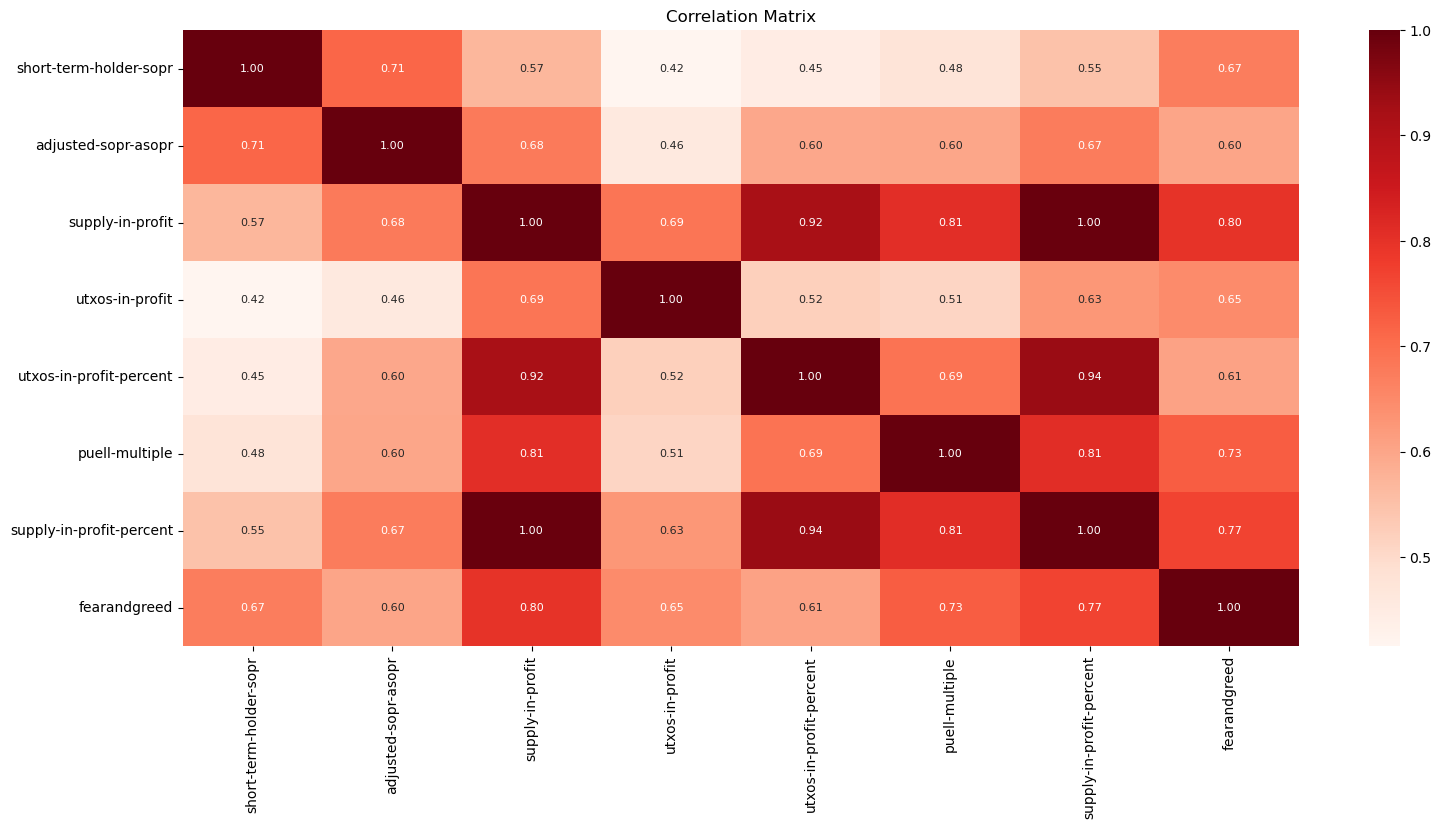

In [49]:
plt.figure(figsize=(18, 8))  # Increase the figure size
sns.heatmap(correlation_matrix_most_relevant, annot=True, cmap=plt.cm.Reds, fmt=".2f", annot_kws={"size": 8}) 
plt.title('Correlation Matrix')
plt.show()

Remove Indicators with high correlation with each other.

In [50]:
most_relevant_indicators.index

Index(['short-term-holder-sopr', 'adjusted-sopr-asopr', 'supply-in-profit',
       'utxos-in-profit', 'utxos-in-profit-percent', 'puell-multiple',
       'supply-in-profit-percent', 'fearandgreed'],
      dtype='object')

In [51]:
drop_list = ['utxos-in-profit-percent', 'puell-multiple', 'supply-in-profit-percent', 'fearandgreed']
most_correlated_indicators = combined_dataframe[most_relevant_indicators.index].drop(drop_list, axis=1)

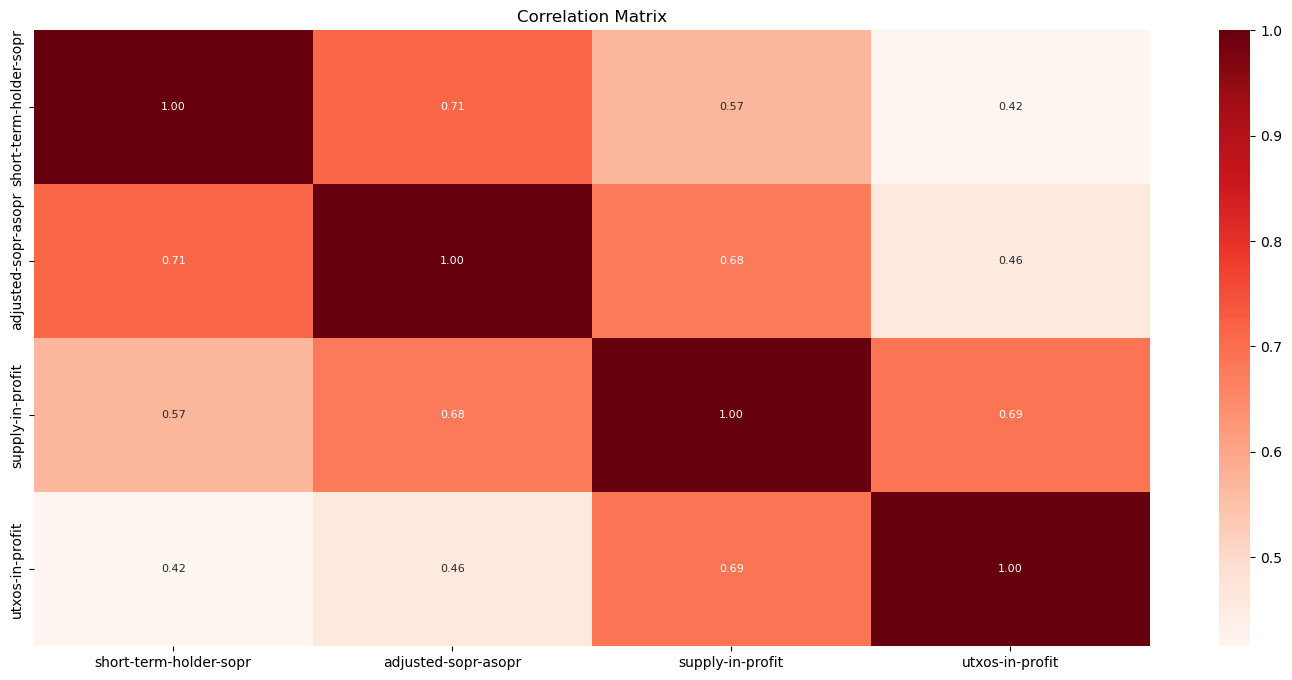

In [52]:
plt.figure(figsize=(18, 8))  # Increase the figure size
sns.heatmap(most_correlated_indicators.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f", annot_kws={"size": 8}) 
plt.title('Correlation Matrix')
plt.show()

In [53]:
most_correlated_indicators['bias'] = 1

## All Indicators

In [54]:
all_indicators = combined_dataframe.drop(['price', 'fearandgreed'], axis=1)
all_indicators['bias'] = 1

# Optimization

## Fear and Greed

### Strategy

In [55]:
start_idx = 260

prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=combined_dataframe['fearandgreed'][start_idx:].copy().values,
        prices=combined_dataframe.price[start_idx:].copy().values)

### Plot

In [56]:
plot("fearandgreed", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

### Subplot

In [57]:
# Manually segment your data
downtrend_start_idx = start_idx
downtrend_end_idx = 465

sideway_start_idx = 465
sideway_end_idx = 735

uptrend_start_idx =  735
uptrend_end_idx =  len(combined_dataframe['fearandgreed'])

# Test strategy on each segment
downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[downtrend_start_idx:downtrend_end_idx].copy(),
    prices=combined_dataframe.price[downtrend_start_idx:downtrend_end_idx].copy().values)

sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[sideway_start_idx:sideway_end_idx].copy(),
    prices=combined_dataframe.price[sideway_start_idx:sideway_end_idx].copy().values)

uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[uptrend_start_idx:uptrend_end_idx].copy(),
    prices=combined_dataframe.price[uptrend_start_idx:uptrend_end_idx].copy().values)

# Collect dates for each segment
downtrend_dates = Dates[downtrend_start_idx:downtrend_end_idx]

sideway_dates = Dates[sideway_start_idx:sideway_end_idx]

uptrend_dates = Dates[uptrend_start_idx:uptrend_end_idx]



# Create tuples for each segment
uptrend_data = (uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total, uptrend_dates)

sideway_data = (sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total, sideway_dates)

downtrend_data = (downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total, downtrend_dates)

# Plot the segments
subplot("Fearandgreed", downtrend_data, sideway_data, uptrend_data)


## Genetic - Linear Model - All Indicators

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


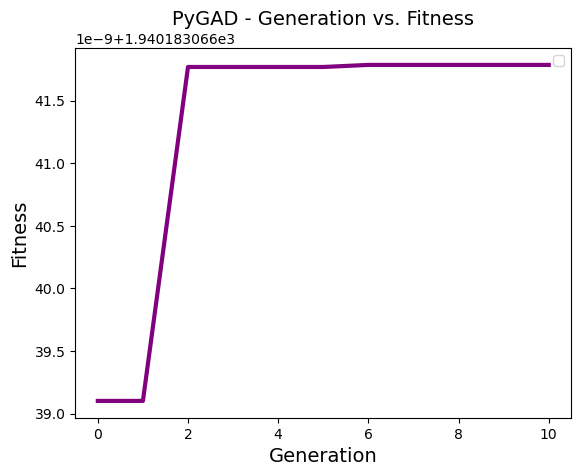

Best Fitness: 1940.1830656417842


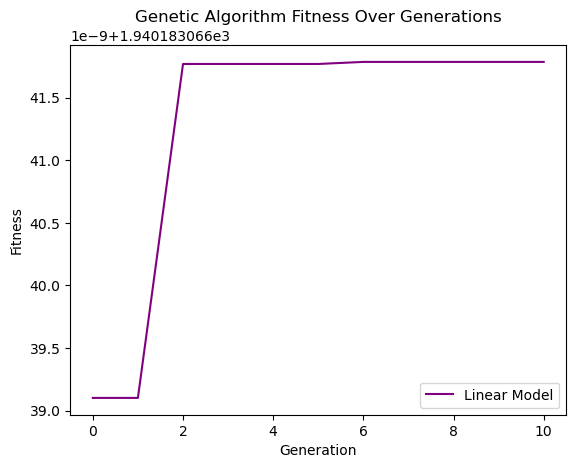

In [60]:
# Create the initial population
num_individuals = 2
num_genes = len(all_indicators.columns)
initial_population = np.random.rand(num_individuals, num_genes)  # Random initialization

# Configure Genetic Algorithm parameters
num_generations = 10
mutation_rate = 0.01
prices = combined_dataframe.price.values

fitness_values, best_fitness_all_indicators_linear, best_coefficients_all_indicators_linear = linear_genetic_algorithm(data=all_indicators[ : start_idx].copy(),
                      prices=prices[:start_idx].copy(), 
                      num_individuals=num_individuals, 
                      num_genes=num_genes, 
                      num_generations=num_generations,
                      mutation_rate=mutation_rate, 
                      initial_population=initial_population)

print("Best Fitness:", best_fitness_all_indicators_linear)
# print("Best Coefficients:", best_coefficients_all_indicators_linear)

plot_fitness(fitness_values, num_generations)

In [59]:
,.

SyntaxError: invalid syntax (1314533285.py, line 1)

In [ ]:
np.where(abs(best_coefficients_all_indicators_linear) >1)[0].shape

### Strategy

In [ ]:
# create new indicator
new_indicator = np.dot(all_indicators, best_coefficients_all_indicators_linear)
min_value = np.min(new_indicator)
max_value = np.max(new_indicator)
# Normalize new_indicator to range [0, 100]
new_indicator = ((new_indicator - min_value) / (max_value - min_value)) * 100

# run strategy
prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=new_indicator[start_idx:].copy(),
        prices=combined_dataframe.price[start_idx:].copy().values)

### Plot 

In [ ]:
plot("all indicators", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

### Subplot

In [ ]:
# Manually segment your data
downtrend_start_idx = start_idx
downtrend_end_idx = 465

sideway_start_idx = 465
sideway_end_idx = 735

uptrend_start_idx =  735
uptrend_end_idx =  len(new_indicator)

# Test strategy on each segment
downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total = strategy(
    indcator=new_indicator[downtrend_start_idx:downtrend_end_idx].copy(),
    prices=combined_dataframe.price[downtrend_start_idx:downtrend_end_idx].copy().values)

sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total = strategy(
    indcator=new_indicator[sideway_start_idx:sideway_end_idx].copy(),
    prices=combined_dataframe.price[sideway_start_idx:sideway_end_idx].copy().values)

uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total = strategy(
    indcator=new_indicator[uptrend_start_idx:uptrend_end_idx].copy(),
    prices=combined_dataframe.price[uptrend_start_idx:uptrend_end_idx].copy().values)

# Collect dates for each segment
downtrend_dates = Dates[downtrend_start_idx:downtrend_end_idx]

sideway_dates = Dates[sideway_start_idx:sideway_end_idx]

uptrend_dates = Dates[uptrend_start_idx:uptrend_end_idx]

# Create tuples for each segment
downtrend_data = (downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total, downtrend_dates)

sideway_data = (sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total, sideway_dates)

uptrend_data = (uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total, uptrend_dates)

# Plot the segments
subplot("Linear All Indicator", downtrend_data, sideway_data, uptrend_data)


## Genetic - Linear Model - Highly correlated Indicators

In [ ]:
# # Parameters
# num_individuals = 10
# num_genes = len(most_correlated_indicators.columns)

# # Configure Genetic Algorithm parameters
# num_generations = 100
# mutation_rate = 0.01
# prices = combined_dataframe.price.values

# start_idx = 245

# best_fitness, best_coefficients = genetic_algorithm(data=most_correlated_indicators[ : start_idx].copy(),
#                       prices=prices[:start_idx].copy(), 
#                       num_individuals=num_individuals, 
#                       num_genes=num_genes, 
#                       num_generations=num_generations,
#                       mutation_rate=mutation_rate)

# print("Best Fitness:", best_fitness)
# print("Best Coefficients:", best_coefficients)

In [ ]:
# # create new indicator
# new_indicator = np.dot(most_correlated_indicators, best_coefficients)
# min_value = np.min(new_indicator)
# max_value = np.max(new_indicator)
# # Normalize new_indicator to range [0, 100]
# new_indicator = ((new_indicator - min_value) / (max_value - min_value)) * 100

# start_idx = 245

# # run strategy
# prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=new_indicator[start_idx:].copy(),
#         prices=combined_dataframe.price[start_idx:].copy().values)

In [ ]:
# plot("most correlated", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

### Strategy

In [ ]:
prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=combined_dataframe['fearandgreed'][start_idx:].copy().values,
        prices=combined_dataframe.price[start_idx:].copy().values)

### Plot

In [ ]:
plot("fearandgreed", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

### Subplot

In [ ]:
# Manually segment your data
downtrend_start_idx = start_idx
downtrend_end_idx = 465

sideway_start_idx = 465
sideway_end_idx = 735

uptrend_start_idx =  735
uptrend_end_idx =  len(combined_dataframe['fearandgreed'])

# Test strategy on each segment
downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[downtrend_start_idx:downtrend_end_idx].copy(),
    prices=combined_dataframe.price[downtrend_start_idx:downtrend_end_idx].copy().values)

sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[sideway_start_idx:sideway_end_idx].copy(),
    prices=combined_dataframe.price[sideway_start_idx:sideway_end_idx].copy().values)

uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total = strategy(
    indcator=combined_dataframe['fearandgreed'].copy().values[uptrend_start_idx:uptrend_end_idx].copy(),
    prices=combined_dataframe.price[uptrend_start_idx:uptrend_end_idx].copy().values)

# Collect dates for each segment
downtrend_dates = Dates[downtrend_start_idx:downtrend_end_idx]

sideway_dates = Dates[sideway_start_idx:sideway_end_idx]

uptrend_dates = Dates[uptrend_start_idx:uptrend_end_idx]



# Create tuples for each segment
uptrend_data = (uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total, uptrend_dates)

sideway_data = (sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total, sideway_dates)

downtrend_data = (downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total, downtrend_dates)

# Plot the segments
subplot("Fearandgreed", uptrend_data, sideway_data, downtrend_data)


## Genetic - MLP - All Indicators

In [ ]:
.

In [ ]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import logging
from multiprocessing import current_process


In [ ]:
# Neural net layers
input_layer = 170
hidden_layer_1 = 64
bias_1 = hidden_layer_1
output_layer = 1
bias_output = output_layer

# Define the neural network architecture
model = tf.keras.Sequential()
model.add(layers.Dense(hidden_layer_1, activation='relu', input_shape=(input_layer,)))
model.add(layers.Dense(output_layer, activation='relu'))
model.build()

# Create the initial population
num_individuals = 100
num_genes = (input_layer * hidden_layer_1) + bias_1 + (hidden_layer_1 * output_layer) + bias_output
initial_population = np.random.rand(num_individuals, num_genes)  # Random initialization

# Configure Genetic Algorithm parameters
num_generations = 1500
mutation_rate = 0.01
mlp_data = all_indicators.drop(["bias"], axis=1)
prices = combined_dataframe.price.values

start_idx = 260

# Set up logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(message)s')

def mlp_fitness_function(ga_instance, solution, solution_idx):
    try:
        process_name = current_process().name
        #logging.debug(f"Process {process_name} is computing fitness for solution {solution_idx}")

        reshaped_solution = solution.reshape((-1,))

        weights = reshaped_solution[:input_layer * hidden_layer_1].reshape((input_layer, hidden_layer_1))
        biases1 = reshaped_solution[input_layer * hidden_layer_1:input_layer * hidden_layer_1 + bias_1]
        weights2 = reshaped_solution[input_layer * hidden_layer_1 + bias_1:input_layer * hidden_layer_1 + bias_1 + hidden_layer_1 * output_layer].reshape((hidden_layer_1, output_layer))
        biases2 = reshaped_solution[input_layer * hidden_layer_1 + bias_1 + hidden_layer_1 * output_layer:]

        model.set_weights([weights, biases1, weights2, biases2])

        new_indicator = model.predict(mlp_data).reshape(-1)

        min_value = np.min(new_indicator)
        max_value = np.max(new_indicator)
        new_indicator = ((new_indicator - min_value) / (max_value - min_value)) * 100
        print(new_indicator.shape)
        INITIAL_BALANCE = 10000
        cash_balance = INITIAL_BALANCE
        bitcoin_amount = 0
        total_balance = cash_balance
        profit = 0

        for i in range(len(prices)):
            indicator_value = new_indicator[i]
            price = prices[i]

            total_balance = cash_balance + (bitcoin_amount * price)
            bitcoin_amount = ((indicator_value / 100) * total_balance) / price
            cash_balance = total_balance - (bitcoin_amount * price)
            profit = total_balance - INITIAL_BALANCE

        return profit
    except Exception as e:
        print(f"Error in fitness function: {e}")
        raise




# Create a PyGAD instance
ga_instance = pygad.GA(num_generations=num_generations,
                    num_parents_mating=num_individuals//2,
                    initial_population=initial_population,
                    fitness_func=mlp_fitness_function,
                    mutation_percent_genes=mutation_rate, 
                    #parallel_processing=["process", 2],
                    suppress_warnings=True)

# Run the Genetic Algorithm
ga_instance.run()

ga_instance.plot_fitness(plot_type="plot", label=None)
plt.show()

# Get the best solution
best_solution = ga_instance.best_solution()

# Access the best fitness value and corresponding coefficients
best_fitness = best_solution[1]
best_coefficients = best_solution[0]


print("Best Fitness:", best_fitness)
best_coefficients_all_indicators_mlp = best_coefficients


In [ ]:
import pygad
import time

def fitness_func(ga_instance, solution, solution_idx):
    for _ in range(99999999):
        print("hi")
    return 0

ga_instance = pygad.GA(num_generations=5,
                       num_parents_mating=3,
                       sol_per_pop=5,
                       num_genes=10,
                       fitness_func=fitness_func,
                       suppress_warnings=True,
                       parallel_processing=["process", 5])

if __name__ == '__main__':
    t1 = time.time()
    ga_instance.run()
    t2 = time.time()
    print("Time is", t2-t1)


In [ ]:
# best_fitness_all_indicators_mlp, best_coefficients_all_indicators_mlp = mlp_genetic_algorithm(data=mlp_data[ : start_idx].copy(),
#                       prices=prices[:start_idx].copy(), 
#                       num_individuals=num_individuals, 
#                       num_genes=num_genes, 
#                       num_generations=num_generations,
#                       mutation_rate=mutation_rate, 
#                       initial_population=initial_population,
#                       nn_layers = (input_layer, hidden_layer_1,bias_1, output_layer, bias_output),
#                       model = model)

# print("Best Fitness:", best_fitness_all_indicators_mlp)
# print("Best Coefficients:", best_coefficients_all_indicators_mlp)

### Strategy

In [ ]:
# create new indicator

# Reshape the solution to match the neural network weights
reshaped_solution = best_coefficients_all_indicators_mlp.reshape((-1,))

# Set the weights and biases of the neural network model
weights = reshaped_solution[:input_layer * hidden_layer_1].reshape((input_layer, hidden_layer_1))
biases1 = reshaped_solution[input_layer * hidden_layer_1:input_layer * hidden_layer_1 + bias_1]
weights2 = reshaped_solution[input_layer * hidden_layer_1 + bias_1:input_layer * hidden_layer_1 + bias_1 + hidden_layer_1 * output_layer].reshape((hidden_layer_1, output_layer))
biases2 = reshaped_solution[input_layer * hidden_layer_1 + bias_1 + hidden_layer_1 * output_layer:]

model.set_weights([weights, biases1, weights2, biases2])

# Perform forward propagation using the neural network
new_indicator = model.predict(mlp_data)

min_value = np.min(new_indicator)
max_value = np.max(new_indicator)
# Normalize new_indicator to range [0, 100]
new_indicator = ((new_indicator - np.min(new_indicator)) / (np.max(new_indicator) - np.min(new_indicator))) * 100
new_indicator = new_indicator.reshape(-1)  


# run strategy
prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=new_indicator[start_idx:].copy(),
        prices=combined_dataframe.price[start_idx:].copy().values)

### Plot

In [ ]:
plot("MLP All Indicators", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

### Subplot

In [ ]:
# Manually segment your data
downtrend_start_idx = start_idx
downtrend_end_idx = 465

sideway_start_idx = 465
sideway_end_idx = 735

uptrend_start_idx =  735
uptrend_end_idx =  len(new_indicator)

# Test strategy on each segment
downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total = strategy(
    indcator=new_indicator[downtrend_start_idx:downtrend_end_idx].copy(),
    prices=combined_dataframe.price[downtrend_start_idx:downtrend_end_idx].copy().values)

sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total = strategy(
    indcator=new_indicator[sideway_start_idx:sideway_end_idx].copy(),
    prices=combined_dataframe.price[sideway_start_idx:sideway_end_idx].copy().values)

uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total = strategy(
    indcator=new_indicator[uptrend_start_idx:uptrend_end_idx].copy(),
    prices=combined_dataframe.price[uptrend_start_idx:uptrend_end_idx].copy().values)

# Collect dates for each segment
downtrend_dates = Dates[downtrend_start_idx:downtrend_end_idx]

sideway_dates = Dates[sideway_start_idx:sideway_end_idx]

uptrend_dates = Dates[uptrend_start_idx:uptrend_end_idx]

# Create tuples for each segment
downtrend_data = (downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total, downtrend_dates)

sideway_data = (sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total, sideway_dates)

uptrend_data = (uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total, uptrend_dates)

# Plot the segments
subplot("MLP All Indicator", downtrend_data, sideway_data, uptrend_data)


## Sliding Window

In [ ]:
)

In [ ]:
# Create the initial population
num_individuals = 10
num_genes = len(all_indicators.columns)
initial_population = np.random.rand(num_individuals, num_genes)  # Random initialization 

# Configure Genetic Algorithm parameters
num_generations = 10
mutation_rate = 0.01

# Other Parameters
WINDOW_SIZE = 260
counter = 1
new_indicator_values = list()

for i in range(len(all_indicators)-WINDOW_SIZE):
    print('*'*30)
    print(f"Counter: {counter}")

    # Sliding window
    train_data = all_indicators[i:i+WINDOW_SIZE]
    prices = combined_dataframe.price[i:i+WINDOW_SIZE].values

    # Find Coefficeints in past 6 month
    best_fitness_sliding_window, best_coefficients_sliding_window = linear_genetic_algorithm(data=train_data,
                      prices=prices, 
                      num_individuals=num_individuals, 
                      num_genes=num_genes, 
                      num_generations=num_generations,
                      mutation_rate=mutation_rate, 
                      initial_population=initial_population)
    
    # initial_population = np.repeat(best_coefficients_sliding_window[None, :], num_individuals, axis=0 )
    
    # Create New Indicator
    new_indicator = np.dot(all_indicators[i:i+WINDOW_SIZE+1], best_coefficients_sliding_window)
    min_value = np.min(new_indicator)
    max_value = np.max(new_indicator)
    # Normalize new_indicator to range [0, 100]
    new_indicator = ((new_indicator - min_value) / (max_value - min_value)) * 100
    
    if counter == 1:
        new_indicator_values.extend(list(new_indicator))
    
    else:
        new_indicator_values.append(new_indicator[-1])

    print(new_indicator[-1])
    
    
    counter = counter + 1

In [ ]:
# run strategy
prices, indicator_values, profits, cash, bitcoin, total = strategy(indcator=new_indicator_values[start_idx:].copy(),
        prices=combined_dataframe.price[start_idx:].copy().values)

In [ ]:
plot("Sliding Window", prices, indicator_values, profits, cash, bitcoin, total, Dates[start_idx:])

In [ ]:
# Manually segment your data
downtrend_start_idx = start_idx
downtrend_end_idx = 465

sideway_start_idx = 465
sideway_end_idx = 735

uptrend_start_idx =  735
uptrend_end_idx =  len(new_indicator_values)

# Test strategy on each segment
downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total = strategy(
    indcator=new_indicator_values[downtrend_start_idx:downtrend_end_idx].copy(),
    prices=combined_dataframe.price[downtrend_start_idx:downtrend_end_idx].copy().values)

sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total = strategy(
    indcator=new_indicator_values[sideway_start_idx:sideway_end_idx].copy(),
    prices=combined_dataframe.price[sideway_start_idx:sideway_end_idx].copy().values)

uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total = strategy(
    indcator=new_indicator_values[uptrend_start_idx:uptrend_end_idx].copy(),
    prices=combined_dataframe.price[uptrend_start_idx:uptrend_end_idx].copy().values)

# Collect dates for each segment
downtrend_dates = Dates[downtrend_start_idx:downtrend_end_idx]

sideway_dates = Dates[sideway_start_idx:sideway_end_idx]

uptrend_dates = Dates[uptrend_start_idx:uptrend_end_idx]

# Create tuples for each segment
downtrend_data = (downtrend_prices, downtrend_indicator_values, downtrend_profits, downtrend_cash, downtrend_bitcoin, downtrend_total, downtrend_dates)

sideway_data = (sideway_prices, sideway_indicator_values, sideway_profits, sideway_cash, sideway_bitcoin, sideway_total, sideway_dates)

uptrend_data = (uptrend_prices, uptrend_indicator_values, uptrend_profits, uptrend_cash, uptrend_bitcoin, uptrend_total, uptrend_dates)

# Plot the segments
subplot("Fearandgreed", uptrend_data, sideway_data, downtrend_data)


In [ ]:
!conda env export > environment.yml